In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = int(1e5)
x = np.random.normal(size = m)
X = x.reshape(-1, 1)
y = 4. * x + 3. + np.random.normal(0, 3, size=m)

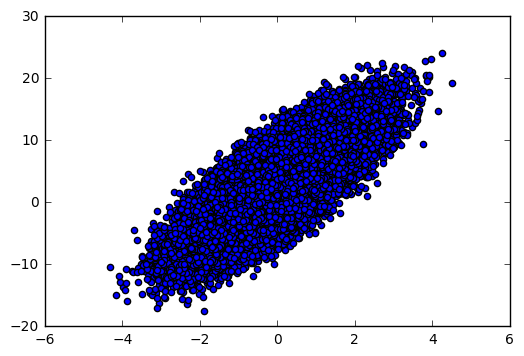

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
def L(theta, X_b, y): # 损失函数
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')

def dL(theta, X_b, y): # 梯度
    # print(X_b.dot(theta))
    gradient = X_b.T.dot(X_b.dot(theta) - y)
    return gradient * 2 / len(y)

def gradient_decend(X_b, y, initial_theta, learn_rate, epoch, epsilon):
    theta = initial_theta
    while epoch > 0:
        epoch -= 1
        gradient = dL(theta, X_b, y)  # 求梯度
        last_theta = theta  # 记录上一次的 Theta
        theta = theta - learn_rate * gradient  # 去梯度的反方向
        # print(theta.shape)
        if np.absolute(L(last_theta, X_b, y) - L(theta, X_b, y)) < epsilon:
            break
    return theta

In [5]:
X_b = np.hstack([np.ones((len(X), 1)), X]) # 构造X_b矩阵
initial_theta = np.zeros(  X_b.shape[1] ) # 初X始化theta值
_theta = gradient_decend(X_b, y, initial_theta, 0.001, 10000, 1e-8)

In [6]:
_theta

array([2.99847567, 4.00593616])

### 随机梯度下降法

In [7]:
def dL_sgd(theta, X_b_i, y_i): # 梯度
    gradient = X_b_i.T.dot(X_b_i.dot(theta) - y_i)
    return gradient * 2.

In [8]:
def sgd(X_b, y, initial_theta, epoch):
    
    t0 = 5
    t1 = 50
    
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(epoch):
        loc = np.random.randint(len(y))
        gradient = dL_sgd(theta, X_b[loc], y[loc])  # 求梯度
        last_theta = theta  # 记录上一次的 Theta
        theta = theta - learning_rate(cur_iter) * gradient  # 去梯度的反方向

    return theta

In [9]:
X_b = np.hstack([np.ones((len(X), 1)), X]) # 构造X_b矩阵
initial_theta = np.zeros(  X_b.shape[1] ) # 初X始化theta值
_theta = sgd(X_b, y, initial_theta, len(y) // 3)

In [10]:
_theta

array([3.00250603, 4.04911878])

### 测试自己封装的随机梯度下降法

In [11]:
import sys
sys.path.append("E:\ltr_do\Python\Python3玩转儿机器学习")

In [12]:
from MyML.LinearRegression import LinearRegression

In [13]:
line_reg = LinearRegression()

In [14]:
%time line_reg.fit_sgd(X, y, epochs = 2)

Wall time: 1.28 s


LinearRegression()

In [15]:
line_reg.coefficient_[0], line_reg.interception_

(4.021438171182915, 3.0110132673791288)

In [16]:
line_reg.score(X, y)

0.640510947358892

### 用波斯顿房价测试模型

In [17]:
from sklearn import datasets

In [18]:
boston = datasets.load_boston()

In [19]:
X = boston.data
y = boston.target

X = X[y < 50]
y = y[y < 50]

In [20]:
from MyML.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2, 666)

In [21]:
from MyML.LinearRegression import LinearRegression

In [22]:
line_re_ = LinearRegression()

In [23]:
from MyML.preprocessing import StandardScaler
standardscaler = StandardScaler()
standardscaler.fit(X_train)
X_train_standard = standardscaler.transform(X_train)
X_test_standard = standardscaler.transform(X_test)

In [38]:
line_re_.fit_sgd(X_train_standard, y_train, epochs=40)

LinearRegression()

In [39]:
line_re_.score(X_test_standard, y_test)

0.8120017041443826

### 使用sklearn中的SGD

In [41]:
from sklearn.linear_model import SGDRegressor

In [51]:
sk_sgd = SGDRegressor(100)

In [52]:
sk_sgd.fit(X_train_standard, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [53]:
sk_sgd.score(X_test_standard, y_test)

0.8130117456922761